# Phase 1

## Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic



pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('transaction_data_100K_full.csv')
data.head()

,EVENT_LABEL,EVENT_TIMESTAMP,LABEL_TIMESTAMP,EVENT_ID,ENTITY_TYPE,ENTITY_ID,card_bin,customer_name,billing_street,billing_city,...,billing_country,customer_job,ip_address,customer_email,billing_phone,user_agent,product_category,order_price,payment_currency,merchant
0,0,2023-02-14T02:27:41Z,2023-02-14T02:27:41Z,100005a527cbcd5de0c4c878288912017,customer,634-80-3034,259703,Ricky,8247 Christopher Mountains Apt. 462,Paint Lick,...,US,IT sales professional,120.79.45.214,woodardbrenda@gmail.com,786-385-2594,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,ARS,fraud_Runolfsson and Sons
1,0,2023-01-13T01:30:22Z,2023-01-13T01:30:22Z,1000091e85eb1cd32ec4b8afcf818fea5,customer,815-02-7980,380256,Kimberly,945 Lowe Vista,Providence,...,US,Aeronautical engineer,212.42.56.229,scottdalton@robinson.biz,266-305-0756-3308,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,BND,fraud_Larkin Ltd
2,0,2023-02-20T04:12:39Z,2023-02-20T04:12:39Z,10000a7862d0ca68257a20149111ec1b4,customer,287-97-0013,471448,Ronald,11307 Munoz Mission Suite 083,Arlington,...,US,Ambulance person,164.238.228.201,pjohnson@cruz.info,+1-068-919-8279,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,NAD,fraud_Metz-Boehm
3,0,2022-12-13T09:06:33Z,2022-12-13T09:06:33Z,1000130fddbb2383646840294dcb7f6fa,customer,819-30-8170,343617,Jessica,90815 Brandon Junctions,San Diego,...,US,"Nurse, mental health",210.108.230.215,progers@hansen-yu.com,+1-115-473-9557,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,LTL,fraud_Quitzon-Goyette
4,0,2023-03-04T09:48:57Z,2023-03-04T09:48:57Z,1000230990f537b8e89786821a3abf10e,customer,285-06-1069,353899,Robert,63165 Natasha Extensions,Mayfield,...,US,Teaching laboratory technician,189.103.115.129,reevesmichael@gmail.com,+1-057-636-3058,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,GIP,fraud_Turner and Sons


# Data Cleaning/Preprocessing

### 1. Dataset General Info
It shows info about the features names, their datatypes, row count, null value count. Clean and prepare the dataset for analysis by handling issues like outliers and anomalies.

The below steps performed provide a structured approach to data preprocessing and feature engineering for fraud detection using machine learning on your Amazon transaction dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116705 entries, 0 to 116704
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EVENT_LABEL        116705 non-null  int64  
 1   EVENT_TIMESTAMP    116705 non-null  object 
 2   LABEL_TIMESTAMP    116705 non-null  object 
 3   EVENT_ID           116705 non-null  object 
 4   ENTITY_TYPE        116705 non-null  object 
 5   ENTITY_ID          116705 non-null  object 
 6   card_bin           116705 non-null  int64  
 7   customer_name      116705 non-null  object 
 8   billing_street     116705 non-null  object 
 9   billing_city       116705 non-null  object 
 10  billing_state      116705 non-null  object 
 11  billing_zip        116705 non-null  int64  
 12  billing_latitude   116705 non-null  float64
 13  billing_longitude  116705 non-null  float64
 14  billing_country    116705 non-null  object 
 15  customer_job       116705 non-null  object 
 16  ip

### 2. Handling Missing Data
Address missing values in the dataset to ensure accurate analysis. The data does not contain any missing values.

In [4]:
data.isnull().sum()

EVENT_LABEL          0
EVENT_TIMESTAMP      0
LABEL_TIMESTAMP      0
EVENT_ID             0
ENTITY_TYPE          0
ENTITY_ID            0
card_bin             0
customer_name        0
billing_street       0
billing_city         0
billing_state        0
billing_zip          0
billing_latitude     0
billing_longitude    0
billing_country      0
customer_job         0
ip_address           0
customer_email       0
billing_phone        0
user_agent           0
product_category     0
order_price          0
payment_currency     0
merchant             0
dtype: int64

### 3. Data Type Conversion

Convert data types as needed to ensure compatibility with machine learning algorithms. Here, we will be converting the timestamp columns to datetime datatype.

In [5]:
data['EVENT_TIMESTAMP'] = pd.to_datetime(data['EVENT_TIMESTAMP'], infer_datetime_format=True)
data['LABEL_TIMESTAMP'] = pd.to_datetime(data['LABEL_TIMESTAMP'], infer_datetime_format=True)
data.dtypes

EVENT_LABEL                   int64
EVENT_TIMESTAMP      datetime64[ns]
LABEL_TIMESTAMP      datetime64[ns]
EVENT_ID                     object
ENTITY_TYPE                  object
ENTITY_ID                    object
card_bin                      int64
customer_name                object
billing_street               object
billing_city                 object
billing_state                object
billing_zip                   int64
billing_latitude            float64
billing_longitude           float64
billing_country              object
customer_job                 object
ip_address                   object
customer_email               object
billing_phone                object
user_agent                   object
product_category             object
order_price                 float64
payment_currency             object
merchant                     object
dtype: object

### 4. Remove Duplicate Rows
Eliminate duplicate records from the dataset to avoid biasing the model.The duplicate rows in the dataset will be removed with the below code block.

In [6]:
data.drop_duplicates()

,EVENT_LABEL,EVENT_TIMESTAMP,LABEL_TIMESTAMP,EVENT_ID,ENTITY_TYPE,ENTITY_ID,card_bin,customer_name,billing_street,billing_city,...,billing_country,customer_job,ip_address,customer_email,billing_phone,user_agent,product_category,order_price,payment_currency,merchant
0,0,2023-02-14 02:27:41,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,customer,634-80-3034,259703,Ricky,8247 Christopher Mountains Apt. 462,Paint Lick,...,US,IT sales professional,120.79.45.214,woodardbrenda@gmail.com,786-385-2594,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,ARS,fraud_Runolfsson and Sons
1,0,2023-01-13 01:30:22,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,customer,815-02-7980,380256,Kimberly,945 Lowe Vista,Providence,...,US,Aeronautical engineer,212.42.56.229,scottdalton@robinson.biz,266-305-0756-3308,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,BND,fraud_Larkin Ltd
2,0,2023-02-20 04:12:39,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,customer,287-97-0013,471448,Ronald,11307 Munoz Mission Suite 083,Arlington,...,US,Ambulance person,164.238.228.201,pjohnson@cruz.info,+1-068-919-8279,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,NAD,fraud_Metz-Boehm
3,0,2022-12-13 09:06:33,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,customer,819-30-8170,343617,Jessica,90815 Brandon Junctions,San Diego,...,US,"Nurse, mental health",210.108.230.215,progers@hansen-yu.com,+1-115-473-9557,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,LTL,fraud_Quitzon-Goyette
4,0,2023-03-04 09:48:57,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,customer,285-06-1069,353899,Robert,63165 Natasha Extensions,Mayfield,...,US,Teaching laboratory technician,189.103.115.129,reevesmichael@gmail.com,+1-057-636-3058,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,GIP,fraud_Turner and Sons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116700,1,2022-11-24 07:43:43,2022-11-24 07:43:43,1fffe4e48cf55836b733b5dc4b30eb839,customer,593-07-2598,180044,Adam,65416 Cole Track,Goose Lake,...,US,Sport and exercise psychologist,32.125.205.189,suttonmargaret@gmail.com,197-391-1731,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.0; Trident/3.0),entertainment,595.63,MUR,"fraud_Parker, Nolan and Trantow"
116701,0,2023-01-20 07:52:58,2023-01-20 07:52:58,1fffeb32941694b1f0b25016151c609e0,customer,037-89-5070,352609,Jeffery,1495 Jennifer Neck Suite 989,Lansing,...,US,International aid/development worker,11.163.2.23,maryhicks@gmail.com,1-047-305-1670,Opera/8.72.(X11; Linux i686; ku-TR) Presto/2.9.170 Version/10.00,shopping_net,1027.12,CUP,fraud_Stamm-Witting
116702,0,2023-02-07 01:00:00,2023-02-07 01:00:00,1ffff3d968571151016b631bf32b48fa1,customer,178-32-8103,405012,Jason,4004 Alexa Stream Apt. 712,Brentwood,...,US,Product manager,195.96.153.154,dorseykaren@richardson.org,+1-459-503-4030-2638,Mozilla/5.0 (Android 4.0.1; Mobile; rv:30.0) Gecko/30.0 Firefox/30.0,shopping_net,1086.40,ISK,fraud_Price Inc
116703,0,2022-12-29 21:59:00,2022-12-29 21:59:00,1ffff407b1a10026a19c9b4179b0ec6a7,customer,791-41-9826,601154,Kimberly,122 Reynolds Shore,Richardson,...,US,Animator,200.244.199.8,smithjackson@gmail.com,1-084-852-2675-22905,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/5.0),shopping_pos,600.76,CHF,fraud_Pouros-Conroy


### 5. Variance & Inter Quartile Range
Analyze variance and interquartile range to identify potential outliers.Below output shows how the data is spread for the given dataset.

In [7]:
# Calculate measures of spread
variance = data.var()
iqr = data.quantile(0.75) - data.quantile(0.25)

print("\nVariance:\n", variance)
print("\nInterquartile Range (IQR):\n", iqr)


Variance:
 EVENT_LABEL          9.157694e-02
card_bin             1.561706e+10
billing_zip          7.452159e+08
billing_latitude     2.693635e+01
billing_longitude    2.260464e+02
order_price          5.264342e+04
dtype: float64

Interquartile Range (IQR):
 EVENT_LABEL               0.0000
card_bin             132448.0000
billing_zip           45390.0000
billing_latitude          6.6083
billing_longitude        16.8546
order_price              85.2700
dtype: float64


### 6. Feature Selection
Choose relevant features for the fraud detection model.Choose the features/columns that are significant.

In [8]:
columns_to_keep = [
    "EVENT_LABEL",
    "LABEL_TIMESTAMP",
    "EVENT_ID",
    "ENTITY_ID",
    "customer_job",
    "user_agent",
    "product_category",
    "order_price",
    "merchant"
]
filtered_data = data[columns_to_keep]
filtered_data.head()

,EVENT_LABEL,LABEL_TIMESTAMP,EVENT_ID,ENTITY_ID,customer_job,user_agent,product_category,order_price,merchant
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons


In [9]:
# Renaming the Uppercase to Lowercase 
filtered_data = filtered_data.rename(columns={
    "EVENT_LABEL": "event_label", 
    "LABEL_TIMESTAMP": "label_timestamp",
    "EVENT_ID": "event_id",
    "ENTITY_ID": "entity_id"
})
filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons


### 6. Feature Creation
Create new features that may enhance fraud detection. Here we are creating new columns based on the existing columns i.e timestamps and diving it into 'hour of the day' & 'minutes of the day' column.

In [10]:
# create a columns hour_of_the_day and minutes_of_the_day from column 'label_timestamp'
filtered_data['hour_of_the_day'] = filtered_data['label_timestamp'].apply(lambda x: x.hour)
filtered_data['minutes_of_the_day'] = filtered_data['label_timestamp'].apply(lambda x: (x.hour*60)+x.minute)
filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons,2,147
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd,1,90
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm,4,252
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette,9,546
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons,9,588


In [11]:
# Create a time window like 'morning, afternoon, evening, mid-night' based on the minutes_of_the_day column
# This will gives us the better understanding on when the transaction has happenend. Below table shows the time and minutes 
# needed to do this callification for each row

# midnight:: 0:00 to 5:59 i.e, 0<=minutes_of_the_day<=359
# morning:: 6:00 to 11:59 i.e, 360<=minutes_of_the_day<=719
# afternoon:: 12:00 to 17:59 i.e, 720<=minutes_of_the_day<=1079
# evening:: 18:00 to 23:59 i.e, 1080<=minutes_of_the_day<=1439

filtered_data['time_of_the_day'] = filtered_data.apply(lambda row: 
    "midnight" if 0 <= row['minutes_of_the_day'] <= 359 else 
    "morning" if 360 <= row['minutes_of_the_day'] <= 719 else 
    "afternoon" if 720 <= row['minutes_of_the_day'] <= 1079 else 
    "evening", axis=1
)
filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons,2,147,midnight
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd,1,90,midnight
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm,4,252,midnight
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette,9,546,morning
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons,9,588,morning


In [12]:
# Get the Browser name from the 'user_agent' column and create a column 'browser' with the extracted data
filtered_data['browser'] = filtered_data.apply(lambda row: 
    "chrome" if "chrome" in row["user_agent"].lower().split("/", 1)[1] else 
    "safari" if "safari" in row["user_agent"].lower().split("/", 1)[1] else 
    "firefox" if "firefox" in row["user_agent"].lower().split("/", 1)[1] else 
    "opera" if "opera" in row["user_agent"].lower().split("/", 1)[1] else 
    "chrome" if "google" in row["user_agent"].lower().split("/", 1)[1] else 
    "firefox" if "mozilla" in row["user_agent"].lower().split("/", 1)[1] else 
    "trident" if "trident" in row["user_agent"].lower().split("/", 1)[1] else 
    "presto" if "presto" in row["user_agent"].lower().split("/", 1)[1] else 
    "not_known", axis=1)
filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons,2,147,midnight,trident
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd,1,90,midnight,safari
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm,4,252,midnight,safari
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette,9,546,morning,trident
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons,9,588,morning,safari


In [13]:
# Get the device name from the 'user_agent' column and create a column 'device' with the extracted data
filtered_data['device'] = filtered_data.apply(lambda row: 
    "windows" if "windows" in row["user_agent"].lower() else 
    "mac" if "macintosh" in row["user_agent"].lower() else 
    "linux" if "linux" in row["user_agent"].lower() else 
    "iphone" if "iphone" in row["user_agent"].lower() else 
    "android" if "android" in row["user_agent"].lower() else 
    "ipad" if "ipad" in row["user_agent"].lower() else 
    "not_known", axis=1
)
filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons,2,147,midnight,trident,windows
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd,1,90,midnight,safari,mac
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm,4,252,midnight,safari,iphone
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette,9,546,morning,trident,windows
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons,9,588,morning,safari,mac


In [14]:
# Create a new column 'customer_job_capped' that simplifies the column 'customer_job' into 25 different categories

# categories:
# software -> IT, Technical, network, software engineer, Data Scientist, site engineer, colour technologist, Database, developer
# other_engineering -> 
# scientist -> scientist, researcher, research
# teacher -> teacher, education, tutor
# airline -> airline, pilot
# medical -> biomedical, hospital, doctor, health, mental, psychotherapist, Chiropractor, dentist, Pharmacologist, Radiation, Pharmacist, ecologist, Psychologist, Therapist, Immunologist, Clinical 
# marketing -> market researcher, multimedia
# banking -> broker, insurance, Retail banker
# civil -> diplomatic, civil, Armed, government
# executive -> chief operating, Chief Strategy
# media -> advertising, editorial
# nature -> nature conservation, nature
# trading -> Trade union, Bonds trader
# lawyer -> Lawyer
# advertising -> journalist


software = [
    "IT", 
    "technical", 
    "network engineer", 
    "software engineer", 
    "data scientist", 
    "site engineer", 
    "colour technologist", 
    "database", 
    "developer",
    "systems analyst",
    "programmer",
    "data",
    "it consultant",
    "intelligence analyst"
]

mathematician = [
    "stats",
    "statistician",
    "mathematics"
]

other_engineering = [
    "engineer",
]

scientist = [
    "scientist", 
    "researcher", 
    "research",
    "science writer", 
    "scientific", 
    "laboratory",
    "astronomer"

]

teaching = [
    "teacher", 
    "education", 
    "tutor",
    "librarian",
    "academic",
    "professor",
    "learning mentor"
]

airline = [
    "airline", 
    "pilot",
    "cabin crew"
]

medical = [
    "biomedical", 
    "hospital", 
    "doctor", 
    "health", 
    "mental", 
    "psychotherapist", 
    "chiropractor", 
    "dentist", 
    "pharmacologist", 
    "radiation", 
    "pharmacist", 
    "ecologist", 
    "psychologist", 
    "therapist", 
    "immunologist", 
    "clinical",
    "medicine",
    "nurse",
    "orthoptist",
    "oncologist",
    "ophthalmologist",
    "toxicologist",
    "neurosurgeon",
    "homeopath",
    "meteorologist",
    "psychiatrist",
    "haematologist",
    "ergonomist",
    "optometrist",
    "geochemist",
    "pathologist",
    "metallurgist",
    "dietitian",
    "chemist",
    "chiropodist",
    "surgeon",
    "microbiologist",
    "ambulance",
    "diagnostic",
    "paramedic",
    "acupuncturist",
    "medical physicist",
    "medical",
    "midwife",
    "herbalist",
    "osteopath",
    "acupuncturist"
]

marketing = [
    "market researcher", 
    "multimedia",
    "marketing"
]

nature = [
    "nature conservation", 
    "nature"
]

trader = [
    "trade union", 
    "bonds trader",
    "trading",
    "trader",
    "dealer"
]

lawyer = [
    "lawyer", 
    "trade mark attorney", 
    "attorney"
]

journalism = [
    "journalist",
    "journalist",
    "journalism"
]

finance = [
    "broker",
    "insurance",
    "retail banker",
    "banker",
    "banking",
    "financial",
    "pension scheme"
]

civil = [
    "diplomatic", 
    "civil", 
    "armed", 
    "government",
    "prison",
    "tax professional",
    "tax inspector",
    "immigration officer",
    "information officer",
    "personnel officer"
]

executive = [
    "chief operating", 
    "chief strategy",
    "chief marketing",
    "chief of staff",
    "chief executive",
    "chief financial",
    "chief technology",
    "executive"
]

media = [
    "advertising", 
    "editorial",
    "publishing rights manager"
]

politician = [
    "politics",
    "politician"
]

sports = [
    "sports",
    "sport",
    "fitness"
]

designer = [
    "illustrator",
    "oceanographer",
    "medical illustrator",
    "web designer",
    "graphics",
    "designer",
    "editor",
    "film/video"
    "film",
    "animator",
    "artist",
    "theatre director",
    "theatre",
    "art",
    "gallery",
    "architect"
]

food = [
    "restaurant",
    "food",
    "hotel",
    "catering",
    "farm"
]

travel = [
    "tour",
    "tourist",
    "leisure",
    "travel",
    "travel agency",
    "logistics and distribution manager",
    "quality manager",
    "theme park",
    "travel agency"
    
]

manager = [
    "retail manager",
    "customer service manager",
    "information systems manager",
    "product manager",
    "production manager",
    "call centre manager",
    "facilities manager",
    "risk manager",
    "records manager",
    "office manager",
    "location manager",
    "stage manager",
    "conference centre manager",
    "quarry manager",
    "energy manager",
    "television floor manager",
    "forest/woodland manager"
]

real_estate = [
    "housing manager", 
    "estate manager", 
    "purchasing", 
    "warehouse manager", 
    "accommodation manager",
    "public house manager", 
    "heritage manager",
    "logistics",
    "town planner",
    "industrial buyer"
]

entertainment = [
    "actor",
    "radio",
    "social",
    "media"
    
]

filtered_data['customer_job_capped'] = filtered_data.apply(lambda row: 
    "software" if any(keyword in row["customer_job"].lower() for keyword in software) else
    "mathematician" if any(keyword in row["customer_job"].lower() for keyword in mathematician) else
    "scientist" if any(keyword in row["customer_job"].lower() for keyword in scientist) else
    "teaching" if any(keyword in row["customer_job"].lower() for keyword in teaching) else
    "airline" if any(keyword in row["customer_job"].lower() for keyword in airline) else
    "medicine" if any(keyword in row["customer_job"].lower() for keyword in medical) else
    "marketing" if any(keyword in row["customer_job"].lower() for keyword in marketing) else
    "nature" if any(keyword in row["customer_job"].lower() for keyword in nature) else
    "trader" if any(keyword in row["customer_job"].lower() for keyword in trader) else
    "lawyer" if any(keyword in row["customer_job"].lower() for keyword in lawyer) else
    "journalism" if any(keyword in row["customer_job"].lower() for keyword in journalism) else
    "finance" if any(keyword in row["customer_job"].lower() for keyword in finance) else
    "civil" if any(keyword in row["customer_job"].lower() for keyword in civil) else
    "executive" if any(keyword in row["customer_job"].lower() for keyword in executive) else
    "media" if any(keyword in row["customer_job"].lower() for keyword in media) else
    "sports" if any(keyword in row["customer_job"].lower() for keyword in sports) else
    "designer" if any(keyword in row["customer_job"].lower() for keyword in designer) else
    "politician" if any(keyword in row["customer_job"].lower() for keyword in politician) else
    "food" if any(keyword in row["customer_job"].lower() for keyword in food) else
    "other_engineering" if any(keyword in row["customer_job"].lower() for keyword in other_engineering) else
    "travel" if any(keyword in row["customer_job"].lower() for keyword in travel) else
    "manager" if any(keyword in row["customer_job"].lower() for keyword in manager) else
    "real_estate" if any(keyword in row["customer_job"].lower() for keyword in real_estate) else
    "entertainment",
    axis=1
)

filtered_data.head()

,event_label,label_timestamp,event_id,entity_id,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped
0,0,2023-02-14 02:27:41,100005a527cbcd5de0c4c878288912017,634-80-3034,IT sales professional,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/5.1),grocery_net,95.77,fraud_Runolfsson and Sons,2,147,midnight,trident,windows,entertainment
1,0,2023-01-13 01:30:22,1000091e85eb1cd32ec4b8afcf818fea5,815-02-7980,Aeronautical engineer,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4 rv:6.0; cmn-TW) AppleWebKit/531.26.2 (KHTML, like Gecko) Version/5.0 Safari/531.26.2",kids_pets,21.88,fraud_Larkin Ltd,1,90,midnight,safari,mac,other_engineering
2,0,2023-02-20 04:12:39,10000a7862d0ca68257a20149111ec1b4,287-97-0013,Ambulance person,"Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like Mac OS X) AppleWebKit/533.2 (KHTML, like Gecko) FxiOS/18.5b4414.0 Mobile/13C311 Safari/533.2",shopping_pos,9.62,fraud_Metz-Boehm,4,252,midnight,safari,iphone,medicine
3,0,2022-12-13 09:06:33,1000130fddbb2383646840294dcb7f6fa,819-30-8170,"Nurse, mental health",Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.1),home,36.96,fraud_Quitzon-Goyette,9,546,morning,trident,windows,medicine
4,0,2023-03-04 09:48:57,1000230990f537b8e89786821a3abf10e,285-06-1069,Teaching laboratory technician,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_11_8 rv:6.0; cs-CZ) AppleWebKit/531.15.7 (KHTML, like Gecko) Version/4.0.2 Safari/531.15.7",shopping_pos,2.08,fraud_Turner and Sons,9,588,morning,safari,mac,scientist


### 7. Drop Insignificant Features
Drop the features that are insignificant or correlated with each other. Hence we will be eliminating features that do not contribute significantly to the model's performance.

In [15]:
new_data = filtered_data.drop(['event_id', 'entity_id'], axis=1)
new_data.sample()

,event_label,label_timestamp,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped
55994,0,2023-01-30 09:22:03,Statistician,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_8_5; rv:1.9.3.20) Gecko/2017-06-05 01:42:28 Firefox/3.6.14,grocery_pos,122.57,fraud_Lockman Ltd,9,562,morning,firefox,mac,mathematician


### 8. Remove Punctuations
All the punctuations will be removed. Preprocess text data by removing punctuations and special characters.

In [16]:
new_data['browser'] = new_data['browser'].str.replace('[^\w\s]', '', regex=True)
new_data['device'] = new_data['device'].str.replace('[^\w\s]', '', regex=True)
new_data['customer_job_capped'] = new_data['customer_job_capped'].str.replace('[^\w\s]', '', regex=True)
new_data.sample(3)

,event_label,label_timestamp,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped
92716,1,2022-12-22 18:11:57,Newspaper journalist,"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/532.0 (KHTML, like Gecko) Chrome/29.0.860.0 Safari/532.0",misc_pos,5.98,fraud_Boyer PLC,18,1091,evening,chrome,windows,journalism
4645,0,2023-02-17 16:43:22,Sales executive,Opera/9.83.(Windows NT 6.0; sk-SK) Presto/2.9.175 Version/12.00,food_dining,90.01,"fraud_Graham, Hegmann and Hammes",16,1003,afternoon,presto,windows,executive
105587,0,2023-02-23 22:10:43,Media buyer,"Mozilla/5.0 (Windows 98; Win 9x 4.90) AppleWebKit/534.0 (KHTML, like Gecko) Chrome/36.0.816.0 Safari/534.0",kids_pets,53.13,fraud_Brown Inc,22,1330,evening,chrome,windows,entertainment


### 9. Feature Scaling
Scale the order_price using MinMaxScaler from sklearn.Scale numerical features to bring them to the same scale.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_data['order_price_scaled'] = scaler.fit_transform(new_data[['order_price']])
new_data.sample(5)

,event_label,label_timestamp,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped,order_price_scaled
43437,0,2023-01-09 04:46:50,"Surveyor, quantity",Mozilla/5.0 (Windows NT 5.01; si-LK; rv:1.9.2.20) Gecko/2020-10-08 07:13:17 Firefox/9.0,misc_pos,621.79,fraud_Spencer-Runolfsson,4,286,midnight,firefox,windows,entertainment,0.028143
23204,0,2023-02-26 18:03:42,"Engineer, control and instrumentation",Opera/8.64.(Windows NT 5.01; or-IN) Presto/2.9.162 Version/11.00,misc_pos,8.84,fraud_Stamm-Rodriguez,18,1083,evening,presto,windows,other_engineering,0.000355
98739,0,2023-03-04 07:31:28,"Scientist, research (physical sciences)",Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.0; Trident/3.1),grocery_pos,296.37,fraud_Koepp-Parker,7,451,morning,trident,windows,scientist,0.013390
62172,0,2022-12-19 10:04:29,"Doctor, hospital","Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_12_6 rv:4.0; iu-CA) AppleWebKit/535.5.2 (KHTML, like Gecko) Version/5.0.3 Safari/535.5.2",kids_pets,47.08,fraud_Schoen Ltd,10,604,morning,safari,mac,medicine,0.002089
71615,0,2023-03-02 16:36:25,"Nurse, children's",Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 5.0; Trident/3.1),grocery_net,33.73,fraud_Runolfsson and Sons,16,996,afternoon,trident,windows,medicine,0.001484


### 10. Dataset stats 
The mean, median, quartile range stats of columns with numerical datatype. Compute and analyze descriptive statistics of the dataset.

In [18]:
new_data.describe()

,event_label,order_price,hour_of_the_day,minutes_of_the_day,order_price_scaled
count,116705.000000,116705.000000,116705.000000,116705.000000,116705.000000
mean,0.101975,114.683963,11.545846,722.190969,0.005154
std,0.302617,229.441548,6.894782,413.967196,0.010401
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,11.730000,6.000000,367.000000,0.000486
50%,0.000000,53.220000,12.000000,723.000000,0.002367
75%,0.000000,97.000000,17.000000,1079.000000,0.004352
max,1.000000,22059.750000,23.000000,1439.000000,1.000000


### 11. Detecting Outliers

Detecting outliers is an important step in data preprocessing for fraud detection and other machine learning tasks. Outliers are data points that significantly deviate from the majority of the data and can introduce noise and bias into your model. Here are some common techniques for detecting outliers.

In [19]:
# Select numerical columns for outlier detection (excluding label_timestamp and event_id)
numerical_columns = new_data.select_dtypes(include=['float64', 'int64']).columns

# Define a lambda function for outlier detection using IQR
detect_outliers = lambda d: (d < d.quantile(0.25) - 1.5 * (d.quantile(0.75) - d.quantile(0.25))) | (d > d.quantile(0.75) + 1.5 * (d.quantile(0.75) - d.quantile(0.25)))

# Apply outlier detection using lambda function
outliers = new_data[numerical_columns].apply(detect_outliers)

# Display the rows with outliers
print(new_data[outliers.any(axis=1)])


        event_label     label_timestamp                          customer_job  \
6                 1 2023-01-01 17:20:58       Commercial/residential surveyor   
15                0 2023-02-15 00:42:33                                Writer   
17                0 2022-12-25 22:35:45                        Dramatherapist   
21                1 2022-12-20 05:42:33                       Sales executive   
23                1 2022-11-20 03:19:13                     Minerals surveyor   
...             ...                 ...                                   ...   
116700            1 2022-11-24 07:43:43       Sport and exercise psychologist   
116701            0 2023-01-20 07:52:58  International aid/development worker   
116702            0 2023-02-07 01:00:00                       Product manager   
116703            0 2022-12-29 21:59:00                              Animator   
116704            0 2023-02-16 00:09:09               Human resources officer   

                           

# Exploratory Data Ananlysis

Exploratory Data Analysis (EDA) is a crucial step in understanding and preparing your data for analysis and modeling. Below are summaries of the steps you mentioned for EDA, particularly focusing on the 'order_price' feature:

In [20]:
new_data.dtypes

event_label                     int64
label_timestamp        datetime64[ns]
customer_job                   object
user_agent                     object
product_category               object
order_price                   float64
merchant                       object
hour_of_the_day                 int64
minutes_of_the_day              int64
time_of_the_day                object
browser                        object
device                         object
customer_job_capped            object
order_price_scaled            float64
dtype: object

### 1. Feature Engineering

Create new features from existing ones to improve the dataset's predictive power or interpretability.

Example: Creating a 'month' or 'day of the week' feature from the order date.

In [21]:
# From the collinear matrix above it is evident that columns 'order_price_scaled','order_price' are same. There we can only use one among them
df = new_data.drop(['order_price_scaled'], axis=1)
df.sample(2)

,event_label,label_timestamp,customer_job,user_agent,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped
85906,0,2022-12-09 20:02:05,Chief Marketing Officer,"Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_9_1) AppleWebKit/531.0 (KHTML, like Gecko) Chrome/46.0.890.0 Safari/531.0",grocery_pos,132.80,"fraud_Osinski, Ledner and Leuschke",20,1202,evening,chrome,mac,marketing
39445,0,2023-01-20 15:12:22,Learning disability nurse,"Mozilla/5.0 (Linux; Android 3.2.5) AppleWebKit/536.1 (KHTML, like Gecko) Chrome/39.0.822.0 Safari/536.1",gas_transport,47.22,fraud_Parisian and Sons,15,912,afternoon,chrome,linux,medicine


### 2. Univariate Analysis on 'order_price'

Analyze the distribution of the 'order_price' variable on its own.Example: Calculate summary statistics, plot histograms, and check for skewness or outliers in the 'order_price' column.

order_price of most of the datapoints in the dataset are of range 0-2000. That means orders with anything above 2000 are almost nill or considered outliers.

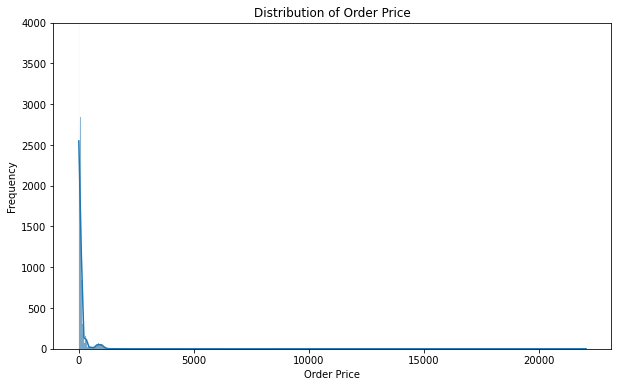

In [22]:
# Distribution of 'order_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['order_price'], kde=True)
plt.title('Distribution of Order Price')
plt.xlabel('Order Price')
plt.ylabel('Frequency')
plt.ylim(0,4000)
plt.show()

### 3. Bivariate Analysis
Explore relationships between 'order_price' and other variables.Example: Scatter plots or correlation analysis between 'order_price' and features like 'product_quantity' or 'customer_rating.

'Most of the orders are related to 'shopping_net' category. The orders of 'travel' category are skewed.

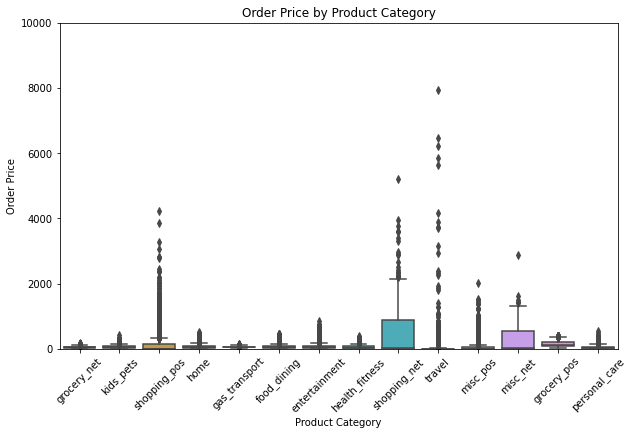

In [23]:
# Relationship between 'order_price' and 'product_category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category', y='order_price', data=df)
plt.title('Order Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Price')
plt.ylim(0, 10000)
plt.xticks(rotation=45)
plt.show()

### 4. Detecting Multicollinearity
Identify high correlations between independent variables, which can affect the stability of regression models.Example: Compute correlation matrices and examine correlations among features to detect multicollinearity.

The columns 'hour_of_the_day' and 'minutes_of_the_day' are collinear to each other which means we should choose one among them because there is no significant information as both are equal.

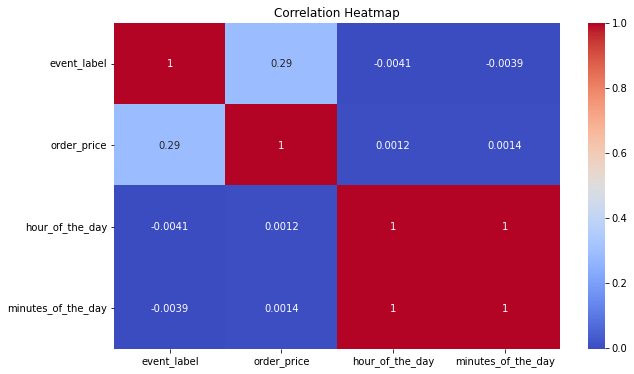

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 5. Outliers in 'order_price' - Boxplot

Detect and handle outliers in the 'order_price' feature.
Example: Use methods like Z-score, IQR, or machine learning models to identify and potentially remove outliers.

c:\users\hemanth gorla\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


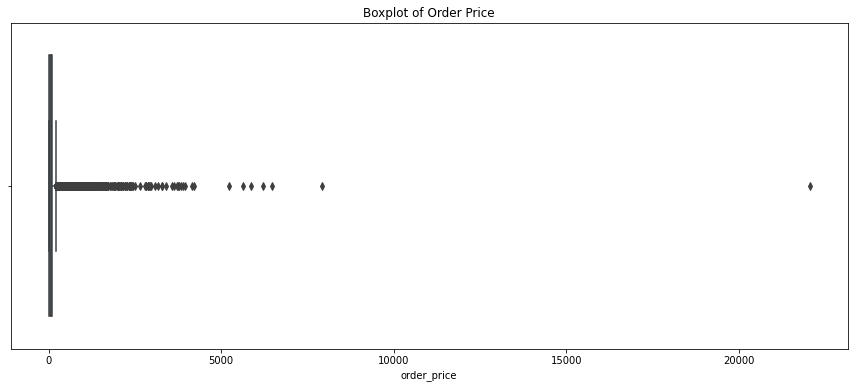

In [25]:
# Box plot of 'order_price'
plt.figure(figsize=(15, 6))
sns.boxplot(df['order_price'])
plt.title('Boxplot of Order Price')
plt.show()

### 6. Frequency Distribution

Analyze the frequency distribution of 'order_price' to understand how values are distributed.
Example: Create a frequency table or plot to visualize the distribution of 'order_price' values.

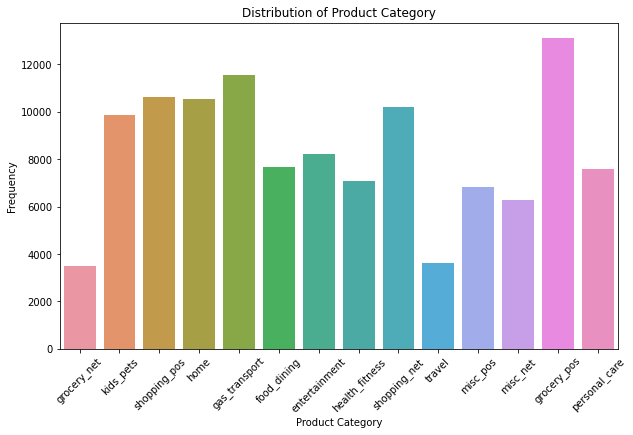

In [26]:
# Distribution of 'product_category'
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', data=df)
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 7. Time Series Analysis of 'order_price'

Explore trends and patterns in 'order_price' over time if applicable.
Example: Plot 'order_price' over different time periods (e.g., days, months) to identify any temporal patterns or seasonality.

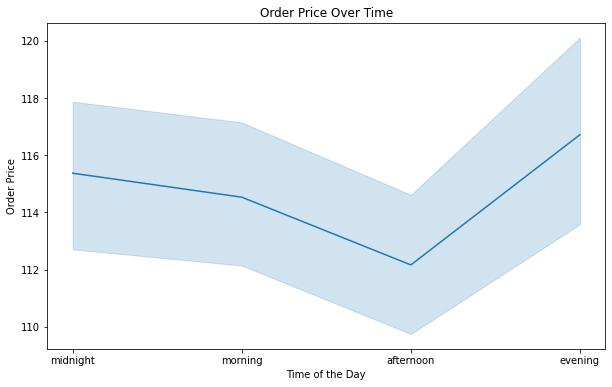

In [27]:
# Trends in 'order_price' over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_of_the_day', y='order_price', data=df)
plt.title('Order Price Over Time')
plt.xlabel('Time of the Day')
plt.ylabel('Order Price')
plt.show()

### 8. Multivariate Analysis

Analyze relationships between multiple variables in the dataset.

Example: Use techniques like heatmaps, pair plots, or regression analysis to study interactions among 'order_price' and other relevant features.

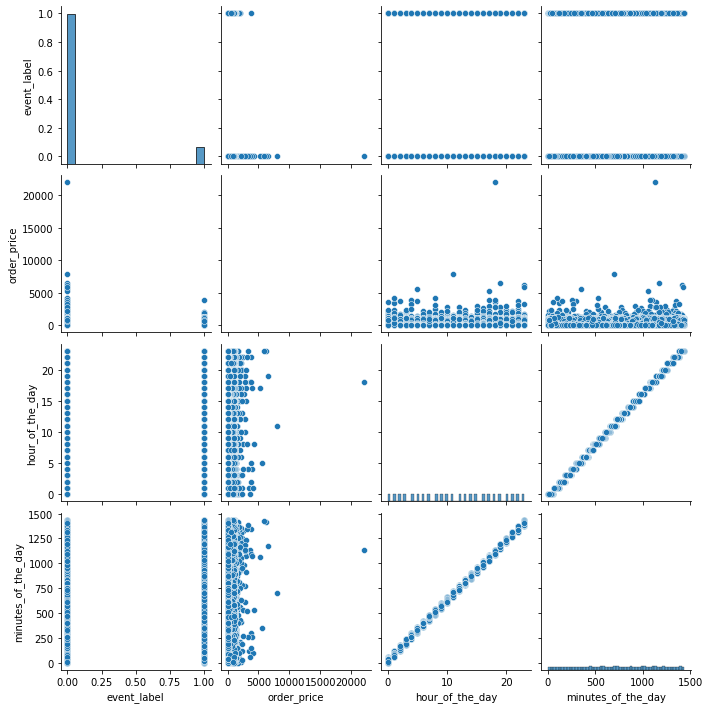

In [28]:
subset_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot
sns.pairplot(df[subset_columns])
plt.show()

### 9. Categorical Data Analysis

Explore and analyze categorical variables in the dataset.

Example: Use bar plots, frequency tables, or chi-squared tests to analyze relationships between categorical variables and 'order_price.'

In [29]:
from scipy.stats import chi2_contingency
# Extract the relevant categorical columns
categorical_data = df[['product_category', 'customer_job_capped', 'time_of_the_day']]

# Create a contingency table
contingency_table = pd.crosstab([categorical_data['product_category'], categorical_data['customer_job_capped']], categorical_data['time_of_the_day'])

# Perform a Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:", contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Contingency Table: time_of_the_day                       afternoon  evening  midnight  morning
product_category customer_job_capped                                       
entertainment    airline                     13       10         9       15
                 civil                       62       60        75       62
                 designer                   218      220       211      222
                 entertainment              503      561       537      573
                 executive                   39       47        23       35
...                                         ...      ...       ...      ...
travel           software                    39       34        32       35
                 sports                       7       10         8       12
                 teaching                    62       62        55       55
                 trader                      15       10        12        8
                 travel                      14       10        10   

### 10. Comparision Between Features

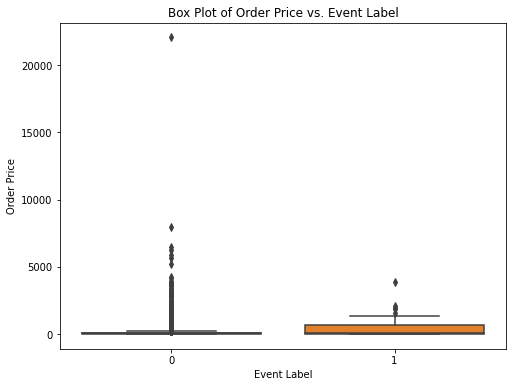

In [30]:
# Box plot of order_price vs. event_label
plt.figure(figsize=(8, 6))
sns.boxplot(x='event_label', y='order_price', data=df)
plt.xlabel('Event Label')
plt.ylabel('Order Price')
plt.title('Box Plot of Order Price vs. Event Label')
plt.show()

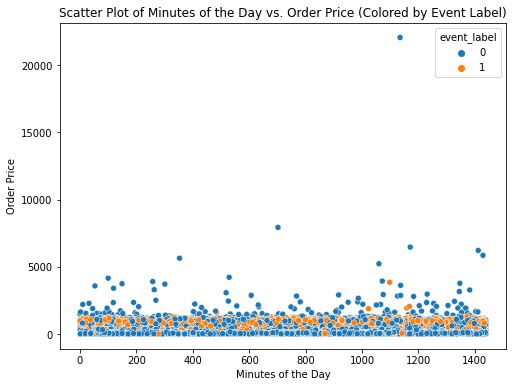

In [31]:
# Scatter plot of minutes_of_the_day vs. order_price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minutes_of_the_day', y='order_price', hue='event_label', data=df)
plt.xlabel('Minutes of the Day')
plt.ylabel('Order Price')
plt.title('Scatter Plot of Minutes of the Day vs. Order Price (Colored by Event Label)')
plt.show()

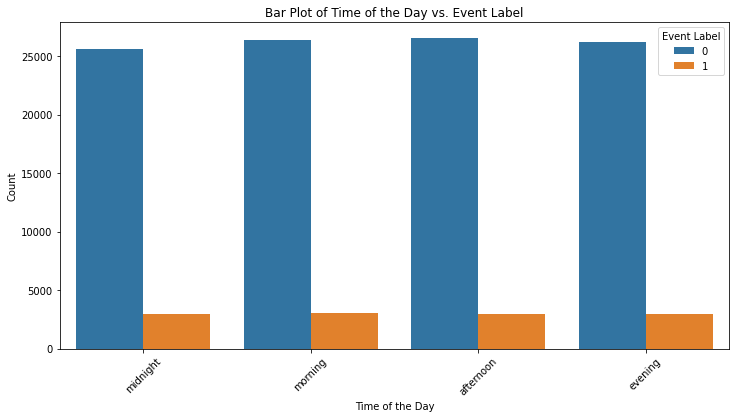

In [32]:
# Bar plot of time_of_the_day vs. event_label
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_the_day', hue='event_label', data=df)
plt.xticks(rotation=45)
plt.xlabel('Time of the Day')
plt.ylabel('Count')
plt.title('Bar Plot of Time of the Day vs. Event Label')
plt.legend(title='Event Label')
plt.show()

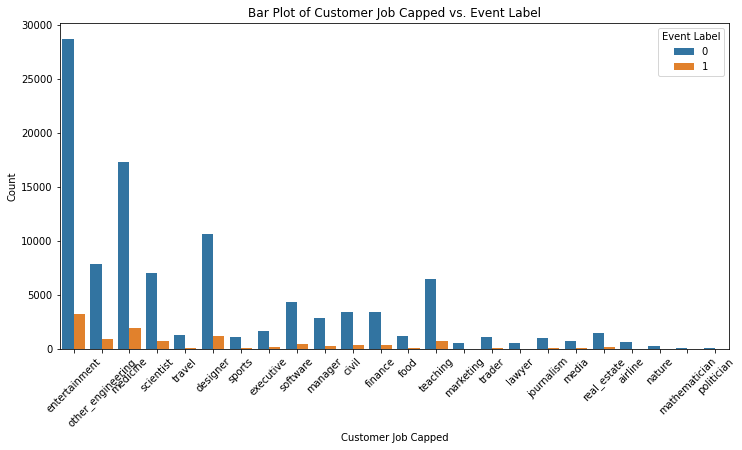

In [33]:
# Bar plot of customer_job_capped vs. event_label
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_job_capped', hue='event_label', data=df)
plt.xticks(rotation=45)
plt.xlabel('Customer Job Capped')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Job Capped vs. Event Label')
plt.legend(title='Event Label')
plt.show()

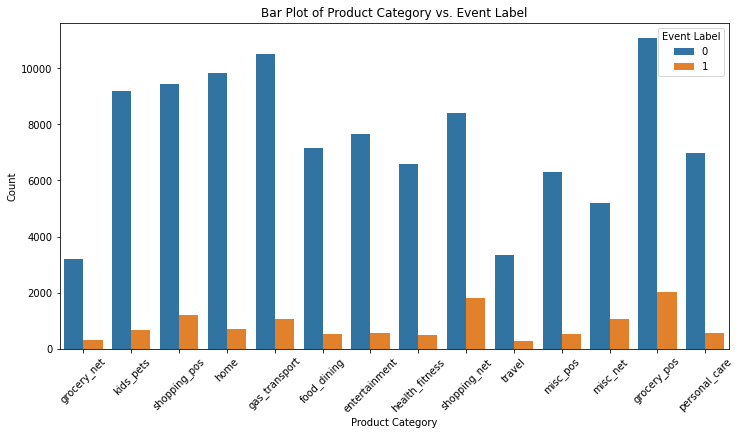

In [34]:
# Bar plot of product_category vs. event_label
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category', hue='event_label', data=df)
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Bar Plot of Product Category vs. Event Label')
plt.legend(title='Event Label')
plt.show()

# Phase 2

**Data Preprocessing**

Unnecessary columns ('label_timestamp', 'customer_job', 'user_agent') are removed from the dataset.
Relevant features ('product_category', 'order_price', 'merchant', 'time_of_the_day', 'browser', 'device', 'customer_job_capped') and the target variable ('event_label') are selected.

In [35]:
final_df = df.drop(['label_timestamp', 'customer_job', 'user_agent'], axis=1)
final_df.head()

,event_label,product_category,order_price,merchant,hour_of_the_day,minutes_of_the_day,time_of_the_day,browser,device,customer_job_capped
0,0,grocery_net,95.77,fraud_Runolfsson and Sons,2,147,midnight,trident,windows,entertainment
1,0,kids_pets,21.88,fraud_Larkin Ltd,1,90,midnight,safari,mac,other_engineering
2,0,shopping_pos,9.62,fraud_Metz-Boehm,4,252,midnight,safari,iphone,medicine
3,0,home,36.96,fraud_Quitzon-Goyette,9,546,morning,trident,windows,medicine
4,0,shopping_pos,2.08,fraud_Turner and Sons,9,588,morning,safari,mac,scientist


**Train-Test Split**

The dataset is split into training and testing sets using an 80-20 split.

In [36]:
from sklearn.preprocessing import LabelEncoder
final_df = final_df.apply(LabelEncoder().fit_transform)

**Logistic Regression Model**

Utilized for classification with specified parameters (random_state=16, solver='lbfgs', max_iter=1000).
Trained on the training data.

In [37]:
feature_cols = ['product_category', 'order_price', 'merchant', 'time_of_the_day', 'browser', 'device', 'customer_job_capped']
X = final_df[feature_cols]
y = final_df['event_label']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)

## 1. Logistic Regression

The Logistic Regression model is employed for classification. After training the model, evaluation metrics are calculated, including accuracy, confusion matrix, classification report, ROC AUC, precision, recall, and F1 score. The code concludes with the display of these metrics.

The dataset information, including column data types, variance, and interquartile range, is also provided for context. Visualizations such as histograms and box plots are generated to visualize the distribution of numerical features.Finally, a contingency table and chi-squared test are performed to analyze the association between the time of day and product category, providing additional insights into the dataset.

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16, solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate evaluation metrics
accuracy_lg = accuracy_score(y_test, y_pred_lg)
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
class_report_lg = classification_report(y_test, y_pred_lg)
roc_auc_lg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)

# Print out the metrics
print(f'Accuracy: {accuracy_lg:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_lg}')
print(f'Classification Report:\n{class_report_lg}')
print(f'ROC AUC: {roc_auc_lg:.2f}')
print(f'Precision: {precision_lg:.2f}')
print(f'Recall: {recall_lg:.2f}')
print(f'F1 Score: {f1_lg:.2f}')

Accuracy: 0.90
Confusion Matrix:
[[20871    96]
 [ 2309    65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20967
           1       0.40      0.03      0.05      2374

    accuracy                           0.90     23341
   macro avg       0.65      0.51      0.50     23341
weighted avg       0.85      0.90      0.85     23341

ROC AUC: 0.64
Precision: 0.40
Recall: 0.03
F1 Score: 0.05


**Logistic Regression Model Performance**

Achieved an accuracy of 90%.
Precision of 40%, recall of 3%, and an F1 score of 5%.
ROC AUC score is 0.64, indicating moderate performance.

Analyzed the association between the time of day and product category.

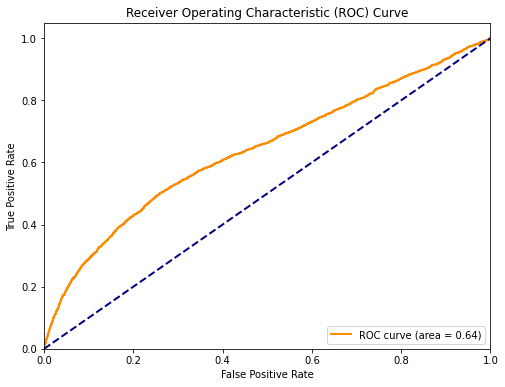

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The closer the ROC curve hugs the top-left corner of the plot, the better the model performs at classifying data into categories.
The Area Under the Curve (AUC) quantifies the overall performance. Usually, AUC ranges from 0 to 1:
AUC = 1: Perfect model (hugs the top-left corner).
AUC = 0.5: Random guessing (diagonal line).
AUC < 0.5: Worse than random guessing.
In our case, the AUC is 0.64, indicating moderate discriminative power.

## 2. Naive Bayes

Gaussian Naive Bayes is employed for classification using default parameters.Trained on the training data.

**Model Training**

Utilized the Gaussian Naive Bayes classifier (GaussianNB()) from scikit-learn.
Trained the model using the training data (X_train and y_train).

In [42]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)
y_pred_nb = GNBclf.predict(X_test)

Accuracy: 0.89
Confusion Matrix:
[[20137   830]
 [ 1738   636]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     20967
           1       0.43      0.27      0.33      2374

    accuracy                           0.89     23341
   macro avg       0.68      0.61      0.64     23341
weighted avg       0.87      0.89      0.88     23341

ROC AUC: 0.66
Precision: 0.43
Recall: 0.27
F1 Score: 0.33


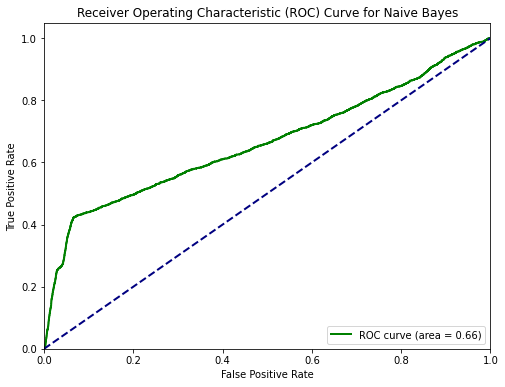

In [43]:
# Calculate evaluation metrics for the Gaussian Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
nb_class_report = classification_report(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, GNBclf.predict_proba(X_test)[:, 1])
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Print out the metrics
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Confusion Matrix:\n{nb_conf_matrix}')
print(f'Classification Report:\n{nb_class_report}')
print(f'ROC AUC: {nb_roc_auc:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')

# Calculate the ROC curve points for the Gaussian Naive Bayes model
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, GNBclf.predict_proba(X_test)[:, 1])

# Plot the ROC curve for Gaussian Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes Model Performance**

The Naive Bayes model achieved an accuracy of 89% on the test data.

Precision, recall, and F1 score were calculated for each class, providing a detailed assessment of the model's predictive ability.
Precision of 43%, recall of 27%, and an F1 score of 33%.

The ROC AUC score of 0.66 indicates moderate discriminative performance.
This model has better ROC  value, which means the model shows slightly better performance, well when compared with Logistic regression.

## 3. Support Vector Machine (SVM)

**SVM Model Training**

Used the Support Vector Machine (SVM) classifier (SVC) from scikit-learn with probability=True to enable probability estimates for ROC AUC calculation.
Trained the model on the training data (X_train and y_train).

In [44]:
from sklearn.svm import SVC

SVCclf = SVC(probability=True)  # Ensure probability=True for ROC AUC
SVCclf.fit(X_train, y_train)
y_pred_svc = SVCclf.predict(X_test)

**SVM Model Performance**

The SVM model achieved an accuracy of 90% on the test data.
Precision, recall, and F1 score were calculated for each class, providing a detailed assessment of the model's predictive ability.
The ROC AUC score of 0.64 indicates moderate discriminative performance.

Accuracy: 0.90
Confusion Matrix:
[[20967     0]
 [ 2374     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20967
           1       1.00      0.00      0.00      2374

    accuracy                           0.90     23341
   macro avg       0.95      0.50      0.47     23341
weighted avg       0.91      0.90      0.85     23341

ROC AUC: 0.64
Precision: 1.00
Recall: 0.00
F1 Score: 0.00


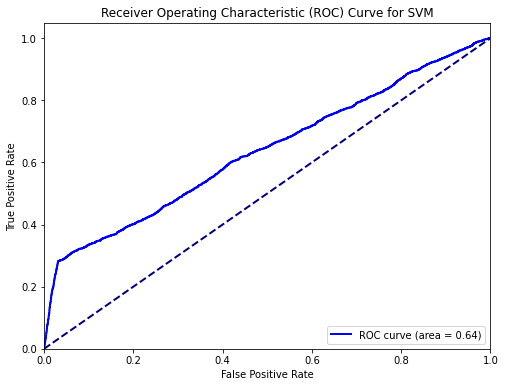

In [45]:
# Calculate evaluation metrics for the SVM model
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_class_report = classification_report(y_test, y_pred_svc, zero_division=1)
svc_roc_auc = roc_auc_score(y_test, SVCclf.predict_proba(X_test)[:, 1])
svc_precision = precision_score(y_test, y_pred_svc, zero_division=1)
svc_recall = recall_score(y_test, y_pred_svc, zero_division=1)
svc_f1 = f1_score(y_test, y_pred_svc, zero_division=1)

# Print out the metrics
print(f'Accuracy: {svc_accuracy:.2f}')
print(f'Confusion Matrix:\n{svc_conf_matrix}')
print(f'Classification Report:\n{svc_class_report}')
print(f'ROC AUC: {svc_roc_auc:.2f}')
print(f'Precision: {svc_precision:.2f}')
print(f'Recall: {svc_recall:.2f}')
print(f'F1 Score: {svc_f1:.2f}')


# Calculate the ROC curve points for the SVM model
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, SVCclf.predict_proba(X_test)[:, 1])

# Plot the ROC curve for SVM model
plt.figure(figsize=(8, 6))
plt.plot(svc_fpr, svc_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


**Conclusion**

The classification report and confusion matrix reveal a *Class imbalance* issue, where the model predicts only the majority class (0) and fails to predict the minority class (1).
Precision, recall, and F1 score for class 1 are affected due to this imbalance.

While the SVM model achieved high accuracy, the class imbalance issue needs attention, and model improvement strategies should be considered.
The ROC curve and associated metrics provide insights into the model's discriminative ability, but the class imbalance should be addressed for a more meaningful evaluation.

## 4. Random Forest Classifier

Utilized the Random Forest Classifier (RandomForestClassifier) from scikit-learn with random_state=18.
Trained the model on the training data (X_train and y_train).

In [46]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(random_state=18)
RFclf.fit(X_train, y_train)
y_pred_rf = RFclf.predict(X_test)

**Random Forest Model Performance**

The Random Forest model achieved an accuracy of 90% on the test data.
Precision, recall, and F1 score were calculated for each class, providing a detailed assessment of the model's predictive ability.
The ROC AUC score of 0.73 indicates good discriminative performance.

Similar to the SVM model, there is a class imbalance issue where the model is more accurate in predicting the majority class (0) than the minority class (1).
This is reflected in the precision, recall, and F1 score for class 1.

Accuracy: 0.90
Confusion Matrix:
[[20504   463]
 [ 1871   503]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     20967
           1       0.52      0.21      0.30      2374

    accuracy                           0.90     23341
   macro avg       0.72      0.59      0.62     23341
weighted avg       0.88      0.90      0.88     23341

ROC AUC: 0.73
Precision: 0.52
Recall: 0.21
F1 Score: 0.30


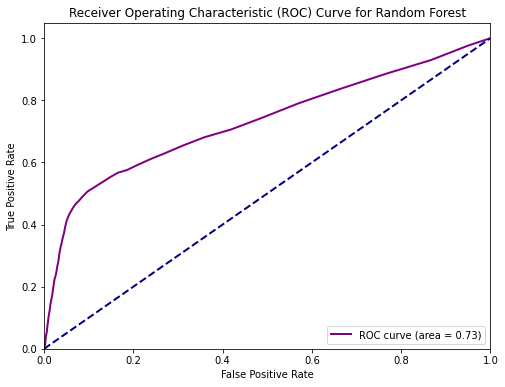

In [47]:
# Calculate evaluation metrics for the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf, zero_division=1)
rf_roc_auc = roc_auc_score(y_test, RFclf.predict_proba(X_test)[:, 1])
rf_precision = precision_score(y_test, y_pred_rf, zero_division=1)
rf_recall = recall_score(y_test, y_pred_rf, zero_division=1)
rf_f1 = f1_score(y_test, y_pred_rf, zero_division=1)

# Print out the metrics
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Confusion Matrix:\n{rf_conf_matrix}')
print(f'Classification Report:\n{rf_class_report}')
print(f'ROC AUC: {rf_roc_auc:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')

# Calculate the ROC curve points for the Random Forest model
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RFclf.predict_proba(X_test)[:, 1])

# Plot the ROC curve for Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

The above ROC curve illustrates how well the Random Forest model distinguishes between positive and negative instances. 
An AUC of 0.73 suggests reasonable predictive performance.

The Random Forest model demonstrates good overall performance with an accuracy of 90% and a promising ROC AUC score.
Attention should be given to the class imbalance issue, and strategies for improving the prediction of the minority 
class may be considered for a more balanced evaluation.

## 5. XGBoost

**XGBoost Model Evaluation**

Calculated various evaluation metrics for assessing the XGBoost model's performance on the test data:
Accuracy
Confusion Matrix
Classification Report (including precision, recall, and F1 score)
ROC AUC score

In [48]:
from xgboost import XGBClassifier

XGBclf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=18)
XGBclf.fit(X_train, y_train)
y_pred_xgb = XGBclf.predict(X_test)

Calculated the ROC curve points (xgb_fpr, xgb_tpr, xgb_thresholds) and plotted the ROC curve.
The visualization helps to understand the trade-off between true positive rate and false positive rate.

**XGBoost Model Performance**

The XGBoost model achieved an accuracy of 90% on the test data.
Precision, recall, and F1 score were calculated for each class, providing a detailed assessment of the model's predictive ability.
The ROC AUC score of 0.73 indicates good discriminative performance.

Similar to the Random Forest and SVM models, there is a class imbalance issue where the model is more accurate in predicting the majority class (0) than the minority class (1).
This is reflected in the precision, recall, and F1 score for class 1.

Accuracy: 0.90
Confusion Matrix:
[[20450   517]
 [ 1821   553]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     20967
           1       0.52      0.23      0.32      2374

    accuracy                           0.90     23341
   macro avg       0.72      0.60      0.63     23341
weighted avg       0.88      0.90      0.88     23341

ROC AUC: 0.73
Precision: 0.52
Recall: 0.23
F1 Score: 0.32


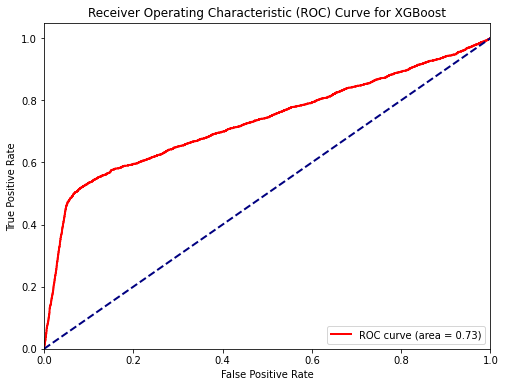

In [49]:
# Calculate evaluation metrics for the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb, zero_division=1)
xgb_roc_auc = roc_auc_score(y_test, XGBclf.predict_proba(X_test)[:, 1])
xgb_precision = precision_score(y_test, y_pred_xgb, zero_division=1)
xgb_recall = recall_score(y_test, y_pred_xgb, zero_division=1)
xgb_f1 = f1_score(y_test, y_pred_xgb, zero_division=1)

# Print out the metrics
print(f'Accuracy: {xgb_accuracy:.2f}')
print(f'Confusion Matrix:\n{xgb_conf_matrix}')
print(f'Classification Report:\n{xgb_class_report}')
print(f'ROC AUC: {xgb_roc_auc:.2f}')
print(f'Precision: {xgb_precision:.2f}')
print(f'Recall: {xgb_recall:.2f}')
print(f'F1 Score: {xgb_f1:.2f}')

# Calculate the ROC curve points for the XGBoost model
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, XGBclf.predict_proba(X_test)[:, 1])

# Plot the ROC curve for XGBoost model
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

The ROC curve illustrates how well the Random Forest model distinguishes between positive and negative instances. An AUC of 0.73 suggests reasonable predictive performance.

The XGBoost model demonstrates good overall performance with an accuracy of 90% and a promising ROC AUC score.
Addressing the class imbalance issue may further enhance the model's ability to predict the minority class.

## 6. AdaBoost Classifier

**ROC Curve and Visualization**

Generated the ROC curve by calculating the false positive rate (ab_fpr), true positive rate (ab_tpr), and associated thresholds (ab_thresholds).
Plotted the ROC curve for visualizing the trade-off between sensitivity and specificity.

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ABclf = AdaBoostClassifier(random_state=18)
ABclf.fit(X_train, y_train)
y_pred_ab = ABclf.predict(X_test)

**AdaBoost Model Performance**

The AdaBoost model achieved an accuracy of 90% on the test data.
Precision, recall, and F1 score were computed for both classes, offering insights into the model's ability to classify instances.
The ROC AUC score of 0.73 indicates good discriminative performance.

Similar to previous models, there is a class imbalance issue where the model is more accurate in predicting the majority class (0) than the minority class (1).
Precision, recall, and F1 score for class 1 are affected by this imbalance.

Accuracy: 0.90
Confusion Matrix:
[[20677   290]
 [ 2062   312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20967
           1       0.52      0.13      0.21      2374

    accuracy                           0.90     23341
   macro avg       0.71      0.56      0.58     23341
weighted avg       0.87      0.90      0.87     23341

ROC AUC: 0.73
Precision: 0.52
Recall: 0.13
F1 Score: 0.21


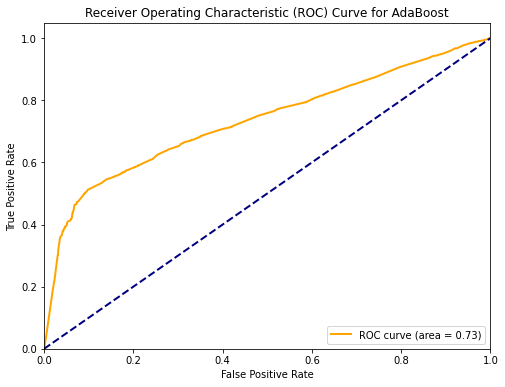

In [51]:
# Calculate evaluation metrics for the AdaBoost model
ab_accuracy = accuracy_score(y_test, y_pred_ab)
ab_conf_matrix = confusion_matrix(y_test, y_pred_ab)
ab_class_report = classification_report(y_test, y_pred_ab, zero_division=1)
ab_roc_auc = roc_auc_score(y_test, ABclf.predict_proba(X_test)[:, 1])
ab_precision = precision_score(y_test, y_pred_ab, zero_division=1)
ab_recall = recall_score(y_test, y_pred_ab, zero_division=1)
ab_f1 = f1_score(y_test, y_pred_ab, zero_division=1)

# Print out the metrics
print(f'Accuracy: {ab_accuracy:.2f}')
print(f'Confusion Matrix:\n{ab_conf_matrix}')
print(f'Classification Report:\n{ab_class_report}')
print(f'ROC AUC: {ab_roc_auc:.2f}')
print(f'Precision: {ab_precision:.2f}')
print(f'Recall: {ab_recall:.2f}')
print(f'F1 Score: {ab_f1:.2f}')

# Calculate the ROC curve points for the AdaBoost model
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_test, ABclf.predict_proba(X_test)[:, 1])

# Plot the ROC curve for AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(ab_fpr, ab_tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % ab_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

The AdaBoost model demonstrates good overall performance with an accuracy of 90% and a ROC AUC score of 0.73.
Addressing the class imbalance issue may further enhance the model's ability to predict the minority class.
The ROC curve and associated metrics provide insights into the model's discriminative ability.

## Overall Conclusion


Based on the above models, it seems like the Random Forest Classifier and XG Boost models are performing relatively better compared to the other models. 
Below is thew analysis for the key metrics of each model:

### Logistic Regression:
- **Accuracy:** 0.90
- **F1 Score (Class 1):** 0.05

### Naive Bayes:
- **Accuracy:** 0.89
- **F1 Score (Class 1):** 0.33

### SVM:
- **Accuracy:** 0.90
- **F1 Score (Class 1):** 0.00

### Random Forest Classifier:
- **Accuracy:** 0.90
- **F1 Score (Class 1):** 0.30
- **Precision (Class 1):** 0.52
- **Recall (Class 1):** 0.22

### XG Boost:
- **Accuracy:** 0.90
- **F1 Score (Class 1):** 0.32
- **Precision (Class 1):** 0.52
- **Recall (Class 1):** 0.23

### Ada Boost Classifier:
- **Accuracy:** 0.90
- **F1 Score (Class 1):** 0.21
- **Precision (Class 1):** 0.52
- **Recall (Class 1):** 0.13

Considering the F1 Score, Precision, and Recall for Class 1, the Random Forest Classifier and XG Boost models seem to have better performance compared to the other models. The choice between the two depends on the specific requirements of the Amazons Fraud detection dataset application. If precision and recall are equally important, we might consider the balance achieved by the Random Forest Classifier. If we want a slight improvement in recall at the cost of precision, XG Boost might be a better choice.

In summary, based on the provided metrics, the Random Forest Classifier and XG Boost models are the better-performing models.

# Phase 3

Here we are saving the trained models. These saved models are used in buikding the webapp

In [53]:
#saving all the models we built earlier in the notebook
import joblib

joblib.dump(ABclf, "adaboost.pkl") 
joblib.dump(XGBclf, "xgboost.pkl") 
joblib.dump(RFclf, "randomforest.pkl") 
joblib.dump(SVCclf, "svm.pkl") 
joblib.dump(GNBclf, "naivebias.pkl") 
joblib.dump(logreg, "logisticreg.pkl") 

['logisticreg.pkl']